In [1]:
#pip install pybaseball

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pybaseball import cache
cache.enable()
from pybaseball import statcast
from sklearn import preprocessing

In [32]:
data = statcast(start_dt="2020-05-24", end_dt="2021-06-25")
data.fillna(0)

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 54.40it/s]
/opt/anaconda3/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
3419,FF,2021-06-25,94.7,-1.81,5.49,"Neris, Héctor",642086,593576,strikeout,swinging_strike,...,1,1.24,0.79,-0.79,28.9,0,0,0,0,0
3619,FF,2021-06-25,94.7,-1.77,5.55,"Neris, Héctor",642086,593576,0,swinging_strike,...,1,1.24,0.73,-0.73,29.5,0,0,0,0,0
3752,FS,2021-06-25,84.0,-1.58,5.95,"Neris, Héctor",642086,593576,0,called_strike,...,1,3.17,0.67,-0.67,41.7,0,0,0,0,0
3795,FS,2021-06-25,85.7,-1.56,5.83,"Neris, Héctor",624413,593576,field_out,hit_into_play,...,1,3.29,0.67,0.67,41.6,0,0,0,0,0
4026,SI,2021-06-25,94.2,-1.97,5.74,"Neris, Héctor",624413,593576,0,foul,...,1,1.63,1.31,1.31,35.8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,FF,2020-07-23,96.1,-3.28,5.13,"Scherzer, Max",543305,453286,field_out,hit_into_play,...,2,1.22,0.75,-0.75,18.1,0,0,0,0,0
380,CU,2020-07-23,79.7,-3.36,5.48,"Scherzer, Max",543305,453286,0,called_strike,...,2,4.41,-0.95,0.95,26.7,0,0,0,0,0
399,FF,2020-07-23,96.7,-3.21,5.33,"Scherzer, Max",543305,453286,0,called_strike,...,2,1.17,0.78,-0.78,23.6,0,0,0,0,0
411,FF,2020-07-23,96.1,-3.38,5.33,"Scherzer, Max",543305,453286,0,ball,...,2,1.02,0.79,-0.79,21.8,0,0,0,0,0


In [33]:
data['events']

3419    strikeout
3619         None
3752         None
3795    field_out
4026         None
          ...    
372     field_out
380          None
399          None
411          None
422          None
Name: events, Length: 651624, dtype: object

In [34]:
description_dic = {'hit_into_play': -1, 'swinging_strike_blocked': 3, 'ball': -2,
           'foul': 0, 'called_strike': 2, 'swinging_strike': 3, 'blocked_ball': -2,
          'foul_tip': 0, 'foul_bunt': 0, 'hit_by_pitch': -3, 'missed_bunt': 3,
          'pitchout': 3, 'bunt_foul_tip': 0, 'foul_pitchout': 0}

data['description'] = data['description'].replace(description_dic)

/var/folders/48/ngfkp6gd3kq3j922jcx_zyhc0000gn/T/ipykernel_16712/466415231.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['description'] = data['description'].replace(description_dic)


In [35]:
unique_values = data['pitch_type'].unique()
pitch_dic = {value: index for index, value in enumerate(unique_values)}
data['pitch_type'] = data['pitch_type'].replace(pitch_dic)

/var/folders/48/ngfkp6gd3kq3j922jcx_zyhc0000gn/T/ipykernel_16712/1523726404.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['pitch_type'] = data['pitch_type'].replace(pitch_dic)


In [38]:
score = data[['events', 'description']]

In [42]:
data['events'].unique()

array(['strikeout', None, 'field_out', 'sac_fly', 'walk', 'single',
       'grounded_into_double_play', 'home_run', 'force_out', 'sac_bunt',
       'hit_by_pitch', 'double', 'field_error', 'double_play', 'triple',
       'fielders_choice_out', 'fielders_choice', 'truncated_pa',
       'strikeout_double_play', 'triple_play', 'catcher_interf',
       'sac_fly_double_play', 'sac_bunt_double_play'], dtype=object)

In [44]:
score.fillna(0)
score[score['events'] == 'home_run']

,events,description
141,home_run,-1
2399,home_run,-1
2882,home_run,-1
2572,home_run,-1
1653,home_run,-1
...,...,...
38,home_run,-1
211,home_run,-1
239,home_run,-1
296,home_run,-1


In [46]:
score.loc[score['events'] == 'home_run', 'description'] = -3
score[score['events']=='home_run']

,events,description
141,home_run,-3
2399,home_run,-3
2882,home_run,-3
2572,home_run,-3
1653,home_run,-3
...,...,...
38,home_run,-3
211,home_run,-3
239,home_run,-3
296,home_run,-3


In [48]:
pitch_dic

{'FF': 0,
 'FS': 1,
 'SI': 2,
 'KC': 3,
 'CH': 4,
 'FC': 5,
 'SL': 6,
 'ST': 7,
 'CU': 8,
 'PO': 9,
 'CS': 10,
 'FA': 11,
 'SV': 12,
 'KN': 13,
 'EP': 14,
 'SC': 15,
 None: 16}

In [193]:
pitch_data = data[['pitch_type', 'release_speed', 'release_pos_x', 'zone', 'release_pos_z', 'plate_x', 'plate_z', 'vx0',
                 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed',
                 'release_spin_rate', 'release_extension', 'release_pos_y', 'spin_axis']]

In [137]:
np.unique(pitch_data.isna(), return_counts = True)

(array([False,  True]), array([12014610,   366246]))

In [139]:
pitch_data['description'] = score['description'] 
new_df = pitch_data.dropna()

TypeError: 'float' object is not subscriptable

In [141]:
new_df

,pitch_type,release_speed,release_pos_x,release_pos_z,zone,plate_x,plate_z,vx0,vy0,vz0,...,ay,az,sz_top,sz_bot,effective_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,description
3419,0.0,94.7,-1.81,5.49,12,0.12,4.16,6.768865,-137.755566,-0.693072,...,30.449915,-15.630556,3.37,1.53,94.6,2228,6.3,54.25,226,3
3619,0.0,94.7,-1.77,5.55,11,-0.16,3.55,5.8389,-137.772022,-2.455717,...,31.299973,-15.159448,3.37,1.53,94.6,2225,6.3,54.19,228,3
3752,1.0,84.0,-1.58,5.95,1,-0.55,3.23,3.70194,-122.258047,-0.029899,...,24.007013,-31.811509,3.36,1.66,83.5,970,5.9,54.57,252,2
3795,1.0,85.7,-1.56,5.83,14,0.84,1.33,7.050352,-124.700065,-3.984507,...,24.500376,-33.60647,3.49,1.6,86.0,975,6.5,54.04,254,-1
4026,2.0,94.2,-1.97,5.74,11,-1.22,3.0,4.856891,-137.187852,-3.52,...,29.822087,-19.819791,3.49,1.6,94.5,2134,6.4,54.11,214,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,0.0,96.1,-3.28,5.13,5,-0.19,2.41,9.8997,-139.62608,-4.473902,...,30.128689,-14.962333,3.41,1.56,96.3,2450,6.4,54.09,227,-1
380,8.0,79.7,-3.36,5.48,7,-0.41,1.85,4.691537,-116.064292,0.319935,...,22.13045,-39.867212,3.51,1.65,79.6,2846,6.2,54.28,60,2
399,0.0,96.7,-3.21,5.33,9,0.48,2.07,11.547336,-140.289508,-5.998194,...,30.880442,-14.099707,3.33,1.65,96.4,2421,6.2,54.29,224,2
411,0.0,96.1,-3.38,5.33,11,-1.17,2.75,7.600636,-139.767747,-4.483222,...,30.151437,-12.476899,3.58,1.75,95.9,2477,6.1,54.38,226,-2


In [197]:
pitch_dic

{'FF': 0,
 'FS': 1,
 'SI': 2,
 'KC': 3,
 'CH': 4,
 'FC': 5,
 'SL': 6,
 'ST': 7,
 'CU': 8,
 'PO': 9,
 'CS': 10,
 'FA': 11,
 'SV': 12,
 'KN': 13,
 'EP': 14,
 'SC': 15,
 None: 16}

In [340]:
fast_balls  = new_df[new_df['pitch_type'] == 8]
#fast_balls = new_df

In [341]:
fast_balls

,pitch_type,release_speed,release_pos_x,release_pos_z,zone,plate_x,plate_z,vx0,vy0,vz0,...,ay,az,sz_top,sz_bot,effective_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,description
2126,8.0,84.8,-1.46,6.21,9,0.66,1.75,4.252943,-123.453143,-3.958357,...,22.485634,-32.485258,3.32,1.51,84.5,2531,5.9,54.62,30,-1
2213,8.0,85.0,-1.37,6.21,9,0.52,1.84,3.852215,-123.801671,-3.623918,...,22.226805,-33.454869,3.32,1.46,84.7,2550,5.8,54.66,40,2
2597,8.0,87.5,-1.26,6.21,14,0.94,2.12,4.589307,-127.444134,-3.337251,...,22.786957,-34.261766,3.32,1.53,87.4,2510,5.9,54.6,43,-2
2882,8.0,84.8,-1.24,6.18,5,0.22,2.16,2.906651,-123.521438,-2.184252,...,24.800661,-36.468531,3.37,1.53,84.2,2579,5.8,54.65,38,-3
3563,8.0,85.1,-1.48,6.22,14,1.05,1.43,5.058069,-123.934394,-3.997737,...,23.382337,-36.467137,3.25,1.56,84.8,2528,5.9,54.58,32,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,8.0,76.7,-3.29,5.64,8,-0.16,1.76,4.634868,-111.732427,0.150829,...,19.733474,-38.830574,3.13,1.51,77.0,2828,6.4,54.12,59,2
151,8.0,77.5,-3.23,5.6,14,0.41,0.79,5.590556,-112.768669,-1.728449,...,21.56633,-39.494985,3.37,1.47,77.5,2861,6.4,54.08,59,-2
192,8.0,78.4,-3.15,5.56,14,0.76,1.29,6.068814,-114.034805,-1.040327,...,21.942127,-38.3151,3.64,1.71,78.6,2778,6.5,53.97,55,-2
249,8.0,77.7,-3.27,5.47,14,0.31,0.13,5.906446,-113.034679,-3.526256,...,19.395914,-36.705111,3.31,1.59,78.0,2688,6.4,54.11,62,-2


In [343]:
fast_balls.columns

Index(['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 'zone',
       'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'effective_speed', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'spin_axis', 'description'],
      dtype='object')

In [346]:
truth = fast_balls['description']
prac = fast_balls.drop(columns = ['description'])

In [348]:
truth.shape

(48518,)

In [350]:
np.unique(truth, return_counts = True)

(array([-3, -2, -1,  0,  2,  3]),
 array([  474, 20196,  6353,  6217,  9414,  5864]))

In [352]:
from sklearn.preprocessing import StandardScaler

# Assuming you have X_train and y_train as your training data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(prac, truth,random_state= 42, test_size=0.2)





In [354]:
#pip install xgboost

In [356]:
import xgboost as xgb
tree = xgb.XGBRegressor(booster = 'gbtree', use_label_encoder=False,
                         n_estimators=20, max_depth = 20, max_leaves = 10, 
                         max_delta_step = 10)
tree.fit(X_train, y_train.astype(int))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:35:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'reg:squarederror'
,base_score,None
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [357]:
prac.columns

Index(['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 'zone',
       'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'effective_speed', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'spin_axis'],
      dtype='object')

In [360]:
preds = tree.predict(X_val)

In [362]:
X_val.shape

(9704, 20)

In [364]:
np.unique(y_val, return_counts = True)

(array([-3, -2, -1,  0,  2,  3]), array([  86, 4085, 1233, 1233, 1931, 1136]))

In [366]:
score = tree.score(X_val, y_val)
score

0.3218744397163391

In [369]:
imp = (tree.feature_importances_)
names = np.array(X_train.columns)
feats = (np.column_stack((names, imp.T)))
imps = np.argsort(feats[:,1])[::-1]
imp_sorted = feats[imps]
imp_sorted

array([['zone', 0.6748119592666626],
       ['plate_x', 0.0650751069188118],
       ['plate_z', 0.048523083329200745],
       ['sz_top', 0.04296130686998367],
       ['sz_bot', 0.04087633639574051],
       ['effective_speed', 0.02842409536242485],
       ['release_extension', 0.013586584478616714],
       ['ax', 0.012768648564815521],
       ['release_speed', 0.01094790268689394],
       ['release_spin_rate', 0.010506927035748959],
       ['vz0', 0.009146247059106827],
       ['vy0', 0.009107934311032295],
       ['release_pos_x', 0.008789461106061935],
       ['ay', 0.007063732016831636],
       ['spin_axis', 0.0061045121401548386],
       ['release_pos_y', 0.0052148038521409035],
       ['az', 0.004183312878012657],
       ['release_pos_z', 0.0019080505007877946],
       ['vx0', 0.0],
       ['pitch_type', 0.0]], dtype=object)

In [370]:
new_df['pitch_type']

3419    0.0
3619    0.0
3752    1.0
3795    1.0
4026    2.0
       ... 
372     0.0
380     8.0
399     0.0
411     0.0
422     0.0
Name: pitch_type, Length: 629228, dtype: float64

In [371]:
pip install bayes_opt

ERROR: Could not find a version that satisfies the requirement bayes_opt (from versions: none)
ERROR: No matching distribution found for bayes_opt
Note: you may need to restart the kernel to use updated packages.


In [375]:
'''#from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization

# Define the objective function to optimize
def objective_function(max_leaves, max_depth, n_estimators):
    # Convert the parameters to integer values
    max_leaves = int(max_leaves)
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    # Create the XGBoost regressor with the given parameters
    model = xgb.XGBRegressor(booster = 'gbtree', use_label_encoder=False,
                         n_estimators=n_estimators, max_depth = max_depth, max_leaves = max_leaves, 
                         max_delta_step = 10)

    # Train and evaluate the model using cross-validation
    # Replace with your own data and evaluation metric
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Return the negative mean squared error as the objective to minimize
    # Replace with your own objective or metric
    return -np.mean(scores)

# Define the parameter space to explore
pbounds = {'max_leaves': (10, 30), 'max_depth': (10, 50), 'n_estimators': (5,15)}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=objective_function, pbounds=pbounds)
optimizer.maximize(init_points=3, n_iter=3)

# Retrieve the best parameters found
best_params = optimizer.max['params']
print("Best Parameters:", best_params)'''


'#from xgboost import XGBRegressor\nfrom bayes_opt import BayesianOptimization\n\n# Define the objective function to optimize\ndef objective_function(max_leaves, max_depth, n_estimators):\n    # Convert the parameters to integer values\n    max_leaves = int(max_leaves)\n    max_depth = int(max_depth)\n    n_estimators = int(n_estimators)\n\n    # Create the XGBoost regressor with the given parameters\n    model = xgb.XGBRegressor(booster = \'gbtree\', use_label_encoder=False,\n                         n_estimators=n_estimators, max_depth = max_depth, max_leaves = max_leaves, \n                         max_delta_step = 10)\n\n    # Train and evaluate the model using cross-validation\n    # Replace with your own data and evaluation metric\n    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=\'neg_mean_squared_error\')\n\n    # Return the negative mean squared error as the objective to minimize\n    # Replace with your own objective or metric\n    return -np.mean(scores)\n

In [376]:
#for fastballs change to prac and truth...
X_train, X_val, y_train, y_val = train_test_split(prac, 
                                                  truth,
                                                  random_state= 42,
                                                  test_size=0.2)

In [377]:
tree = xgb.XGBRegressor(booster = 'gbtree', use_label_encoder=False,
                         n_estimators=15, max_depth = 50, max_leaves = 10, 
                         max_delta_step = 10)
tree.fit(X_train, y_train.astype(int))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:35:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'reg:squarederror'
,base_score,None
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Text(0, 0.5, 'Score')

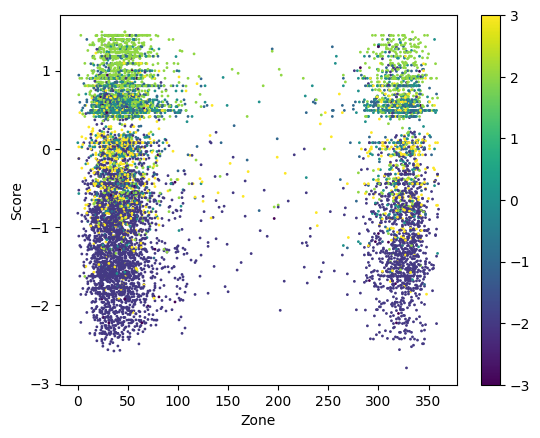

In [381]:
preds = tree.predict(X_val)
plt.scatter(X_val['spin_axis'], preds, c = y_val, s = 1)
plt.colorbar()
plt.xlabel('Zone')
plt.ylabel('Score')


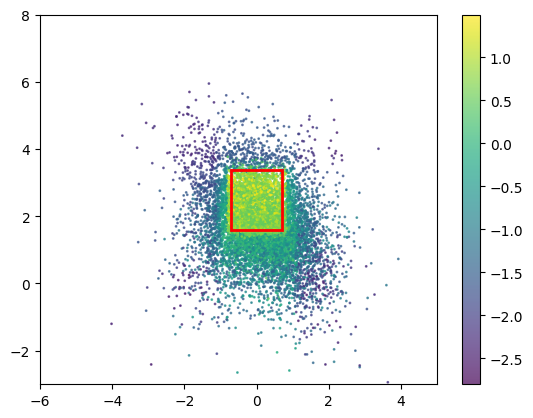

In [383]:
plt.figure(1)
plt.scatter(X_val['plate_x'], X_val['plate_z'], alpha = 0.7, c = preds, s = 1)
plt.gca().add_patch(
    plt.Rectangle((-8.5/12, 1.6), 17/12, 3.37 - 1.6,  # in feet
                  fill=False, edgecolor='red', linewidth=2)
)
plt.xlim(-6,5)
plt.ylim(-3,8)
plt.colorbar()



In [384]:
description_dic

{'hit_into_play': -1,
 'swinging_strike_blocked': 3,
 'ball': -2,
 'foul': 0,
 'called_strike': 2,
 'swinging_strike': 3,
 'blocked_ball': -2,
 'foul_tip': 0,
 'foul_bunt': 0,
 'hit_by_pitch': -3,
 'missed_bunt': 3,
 'pitchout': 3,
 'bunt_foul_tip': 0,
 'foul_pitchout': 0}

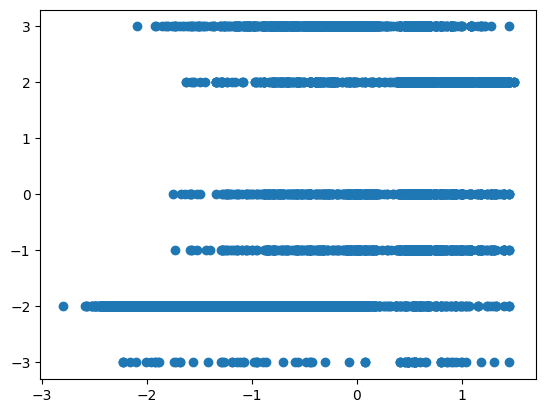

In [386]:
plt.scatter(preds, y_val)

In [391]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE:", mean_squared_error(y_val, preds))
print("MAE:", mean_absolute_error(y_val, preds))
print("R²:", r2_score(y_val, preds))

MSE: 2.5168044567108154
MAE: 1.2948215007781982
R²: 0.31599295139312744
